In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [8]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""

    x_te = x[k_indices[k]]
    y_te = y[k_indices[k]]
    y_te = y_te.reshape([len(y_te), 1])
    
    x_tr = x[np.delete(k_indices, (k), axis=0).flatten()]
    y_tr = y[np.delete(k_indices, (k), axis=0).flatten()]
    y_tr = y_tr.reshape([len(y_tr), 1])
    
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    
    mse, weights = ridge_regression(y_tr, tx_tr, lambda_)
    
    loss_tr = np.sqrt(2 * compute_mse(y_tr, tx_tr, weights)[0, 0])
    loss_te = np.sqrt(2 * compute_mse(y_te, tx_te, weights)[0, 0])
    
    return loss_tr, loss_te

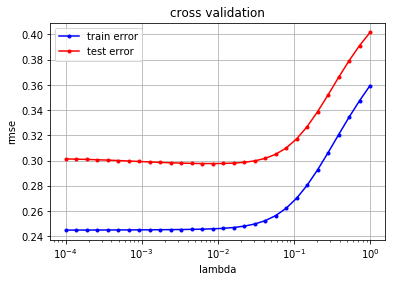

In [10]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 12
    degree = 7
    k_fold = 4
    lambda_ = 0.01
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
#     for degree_ in range(15):
        
        sum_loss_tr = []
        sum_loss_te = []
        for k in range(k_fold): 
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            
            sum_loss_tr.append(loss_tr)
            sum_loss_te.append(loss_te)
        rmse_tr.append(np.mean(sum_loss_tr))
        rmse_te.append(np.mean(sum_loss_te))
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
#     cross_validation_visualization(range(15), rmse_tr, rmse_te)
    
    
cross_validation_demo()

best degree selection

In [16]:
def best_degree_selection():
    seed = 1
    degrees = np.arange(2,11)
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    
    best_rmses = []
    for degree in degrees:
        rmse_te = []
        for ind, lambda_ in enumerate(lambdas):
            sum_loss_te = []
            for k in range(k_fold): 
                loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
                sum_loss_te.append(loss_te)
            rmse_te.append(np.mean(sum_loss_te))
        best_rmses.append(np.min(rmse_te))
    
    print(np.argmin(best_rmses) + 2)
    
best_degree_selection()

7


Variance of RMSE over the folds

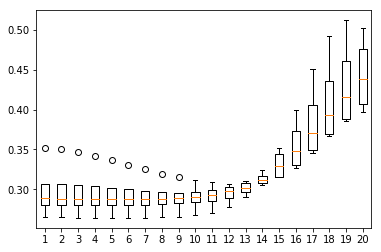

In [20]:
def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambda_ = 0.01
    lambdas = np.logspace(-4, 0, 20)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
        sum_loss_te = []
        for k in range(k_fold): 
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            sum_loss_te.append(loss_te)
        rmse_te.append(sum_loss_te)
    
    plt.figure()
    plt.boxplot(rmse_te)

    plt.show()
        
cross_validation_demo()




## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

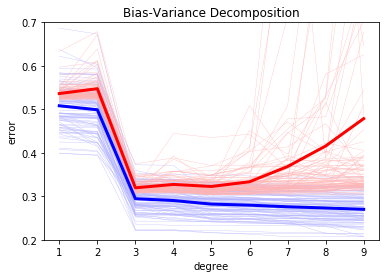

In [87]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from build_polynomial import build_poly

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)

            weights = least_squares(y_tr, tx_tr)

            loss_tr = compute_mse(y_tr, tx_tr, weights)
            loss_te = compute_mse(y_te, tx_te, weights)
            rmse_tr[(index_seed, degree - 1)] = (np.sqrt(2 * loss_tr))
            rmse_te[(index_seed, degree - 1)] = (np.sqrt(2 * loss_te))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

Box plot visualization

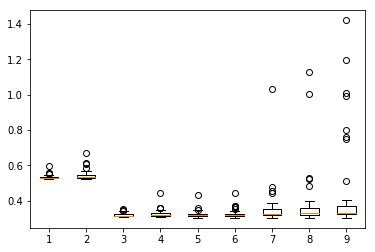

In [51]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from build_polynomial import build_poly

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(50)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)

            weights = least_squares(y_tr, tx_tr)

            loss_tr = compute_mse(y_tr, tx_tr, weights)
            loss_te = compute_mse(y_te, tx_te, weights)
            rmse_tr[(index_seed, degree - 1)] = (np.sqrt(2 * loss_tr))
            rmse_te[(index_seed, degree - 1)] = (np.sqrt(2 * loss_te))

    
    plt.figure()
    plt.boxplot(rmse_te)

    plt.show()

bias_variance_demo()

Bias-variance with ridge regression

In [59]:
def find_best_lambda(x, y, degree, seed):
    """ridge regression demo."""
    # define parameter
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    k_indices = build_k_indices(y, k_fold, 1)
    
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
        sum_loss_te = []
        for k in range(k_fold): 
            _, loss_te, w = cross_validation(y, x, k_indices, k, lambda_, degree)
            sum_loss_te.append(loss_te)
        rmse_te.append(np.mean(sum_loss_te))
    
    return lambdas[np.argmin(rmse_te)]


With Ridge-regression


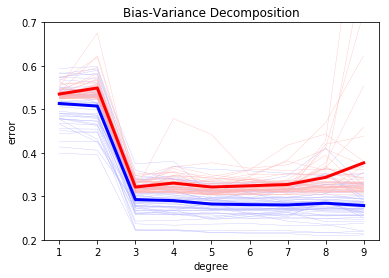

With least-squares


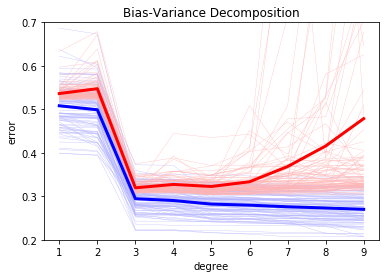

In [60]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from build_polynomial import build_poly

def bias_variance_ridge_demo():
    """The entry."""
    # define parameters
    seeds = range(50)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)
            lambda_ = find_best_lambda(x_tr, y_tr, degree, seed)
            _, weights = ridge_regression(y_tr, tx_tr, lambda_)
            weights = np.squeeze(np.asarray(weights))
#             weights = least_squares(y_tr, tx_tr)
#             print(weights)
            loss_tr = compute_mse(y_tr, tx_tr, weights)
            loss_te = compute_mse(y_te, tx_te, weights)
            rmse_tr[(index_seed, degree - 1)] = (np.sqrt(2 * loss_tr))
            rmse_te[(index_seed, degree - 1)] = (np.sqrt(2 * loss_te))

    plt.figure()
            
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
#     plt.boxplot(rmse_te)
    print("With Ridge-regression")
    plt.show()

bias_variance_ridge_demo()

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)

            weights = least_squares(y_tr, tx_tr)

            loss_tr = compute_mse(y_tr, tx_tr, weights)
            loss_te = compute_mse(y_te, tx_te, weights)
            rmse_tr[(index_seed, degree - 1)] = (np.sqrt(2 * loss_tr))
            rmse_te[(index_seed, degree - 1)] = (np.sqrt(2 * loss_te))
    plt.figure()
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

#     plt.boxplot(rmse_te)

    print("With least-squares")
    plt.show()
bias_variance_demo()

With Ridge-regression


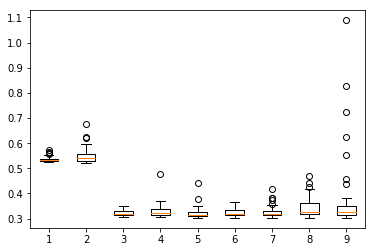

With least-squares


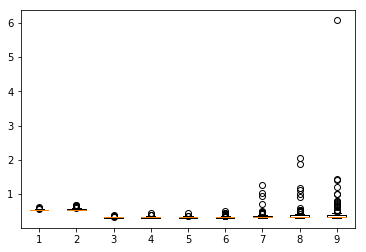

In [62]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization
from build_polynomial import build_poly

def bias_variance_ridge_demo():
    """The entry."""
    # define parameters
    seeds = range(50)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)
            lambda_ = find_best_lambda(x_tr, y_tr, degree, seed)
            _, weights = ridge_regression(y_tr, tx_tr, lambda_)
            weights = np.squeeze(np.asarray(weights))
#             weights = least_squares(y_tr, tx_tr)
#             print(weights)
            loss_tr = compute_mse(y_tr, tx_tr, weights)
            loss_te = compute_mse(y_te, tx_te, weights)
            rmse_tr[(index_seed, degree - 1)] = (np.sqrt(2 * loss_tr))
            rmse_te[(index_seed, degree - 1)] = (np.sqrt(2 * loss_te))

    plt.figure()
            
#     bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
    print("With Ridge-regression")

    plt.boxplot(rmse_te)
    plt.show()

bias_variance_ridge_demo()

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        
        for degree in degrees:
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)

            weights = least_squares(y_tr, tx_tr)

            loss_tr = compute_mse(y_tr, tx_tr, weights)
            loss_te = compute_mse(y_te, tx_te, weights)
            rmse_tr[(index_seed, degree - 1)] = (np.sqrt(2 * loss_tr))
            rmse_te[(index_seed, degree - 1)] = (np.sqrt(2 * loss_te))
    plt.figure()
#     bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
    print("With least-squares")

    plt.boxplot(rmse_te)

    plt.show()
bias_variance_demo()